아파트 실거래가와 인구밀도로 선형회귀 분석...

In [1]:
import pandas as pd

people_df = pd.read_csv('./전처리된_데이터_모음/서울인구_2023_2024_전처리후.csv', )

transaction_df = pd.read_csv('./전처리된_데이터_모음/부동산_실거래가_전처리후_2023_2024.csv', )
# df.info()
# people_df.head()
people_df

,Unnamed: 0,기간,인구
0,0,202301,4447861
1,1,202302,4457982
2,2,202303,4463385
3,3,202304,4465391
4,4,202305,4467999
5,5,202306,4469158
6,6,202307,4471174
7,7,202308,4473734
8,8,202309,4475726
9,9,202310,4472603


In [2]:
transaction_df.head()

,기간,실거래가
0,202301,59199.655314
1,202302,62479.187357
2,202303,62755.648452
3,202304,68204.691229
4,202305,68316.759507


In [4]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  17 non-null     int64
 1   기간          17 non-null     int64
 2   인구          17 non-null     int64
dtypes: int64(3)
memory usage: 540.0 bytes


In [5]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      17 non-null     int64  
 1   실거래가    17 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 404.0 bytes


In [9]:
# df= pd.concat([people_df, transaction_df], join='outer')
merged_df = pd.merge(people_df, transaction_df, on='기간', how='inner')

merged_df

,Unnamed: 0,기간,인구,실거래가
0,0,202301,4447861,59199.655314
1,1,202302,4457982,62479.187357
2,2,202303,4463385,62755.648452
3,3,202304,4465391,68204.691229
4,4,202305,4467999,68316.759507
5,5,202306,4469158,71586.030882
6,6,202307,4471174,69579.503345
7,7,202308,4473734,70804.105488
8,8,202309,4475726,69840.568185
9,9,202310,4472603,60658.356674


In [10]:
from scipy import stats
from statsmodels.formula.api import ols, glm

Reformula = '실거래가 ~ 인구'
regression_result = ols(Reformula, data=merged_df).fit()

regression_result.summary()     # 평가 요약

# F-statistic:	3.962  (F-통계랑이 0과 가까울 수록 적절하다)(독립변수가 1개인데도 어째서인지 적절해보인다...)
# R-squared:	0.221  (회귀식의 설명력을 나타낸다. 즉, 성능. 1에 가까울수록 좋음)          (성능도 어째선지 괜찮다)

# BUT
# R-squared: 0.221     (회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지를 가리키는 지표)
# 실거래가의 변동성 중 약 22.1%만 설명

# P>|t|은 p value 의미한다 t value값을 기준으로 해당하는 값(|t|)과 비교하여 나타낸값으로, 이값은 유의수준에 적합하면
# 할수록, 즉 0.05보다 작고 0에 가까울수록 매우 유의미한 데이터. 0.05보다 크면 불필요한 데이터에 가깝다고 인식.
# P>|t| 열에서 인구행을 보면 0.06 으로 0.05보다 크다!
# 모델 유의성 p-값이 0.066을 0.05보다 크므로 통계적으로 유의미하지않음 ===> 설명력과 예측력이 낮음


# 결론
# 독립변수가 1개라서 부족한 회귀분석으로 판단됨
# 독립변수가 한개이므로 다중공선성도 없음 (=독립변수간 상관관계 없음)

c:\Users\it\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   실거래가   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     3.962
Date:                Fri, 31 May 2024   Prob (F-statistic):             0.0664
Time:                        12:24:28   Log-Likelihood:                -157.81
No. Observations:                  16   AIC:                             319.6
Df Residuals:                      14   BIC:                             321.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.124e+06   5.98e+05     -1.881      0.081   -2.41e+06    1.58e+05
인구             0.2661      0.134      1.990      0.066      -0.021       0.553
==============================================================================
Omnibus:                        1.813   Durbin-Watson:                   0.603
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.372
Skew:                          -0.671   Prob(JB):                        0.503
Kurtosis:                       2.490   Cond. No.                     2.15e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
sample1 = merged_df[merged_df.columns.difference(['실거래가'])]
sample1 = sample1[0:5][:]
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    59223.389987
1    61916.828522
2    63354.695176
3    63888.539431
4    64582.590187
dtype: float64

In [14]:
merged_df[0:5]['실거래가']

0    59199.655314
1    62479.187357
2    62755.648452
3    68204.691229
4    68316.759507
Name: 실거래가, dtype: float64

In [16]:
merged_df[0:5]

,Unnamed: 0,기간,인구,실거래가
0,0,202301,4447861,59199.655314
1,1,202302,4457982,62479.187357
2,2,202303,4463385,62755.648452
3,3,202304,4465391,68204.691229
4,4,202305,4467999,68316.759507


C:\Users\it\AppData\Local\Temp\ipykernel_3200\2086470223.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction, kde='True', color="red", label="transaction")
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000

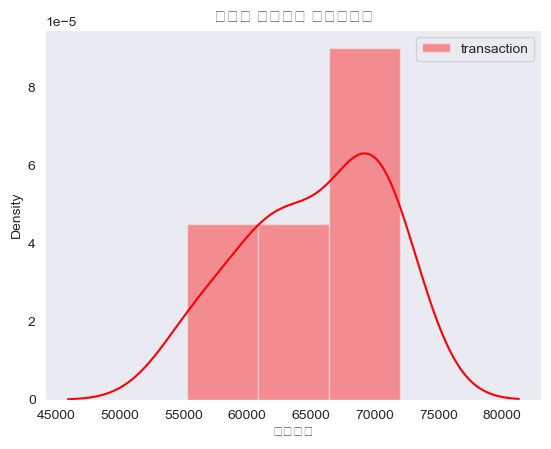

In [19]:
# 시각화 시작

import matplotlib.pyplot as plt
import seaborn as sns

transaction = merged_df['실거래가']

sns.set_style('dark')
sns.distplot(transaction, kde='True', color="red", label="transaction")
plt.title("서울시 실거래가 히스토그램")
plt.legend()
plt.show()

c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IP

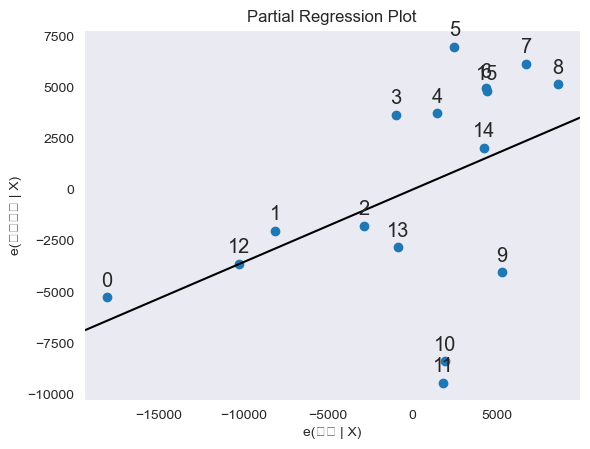

c:\Users\it\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\it\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\it\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:566: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.tight_layout()
c:\Users\it\anaconda3\Lib\site-packages\statsmodels\gr

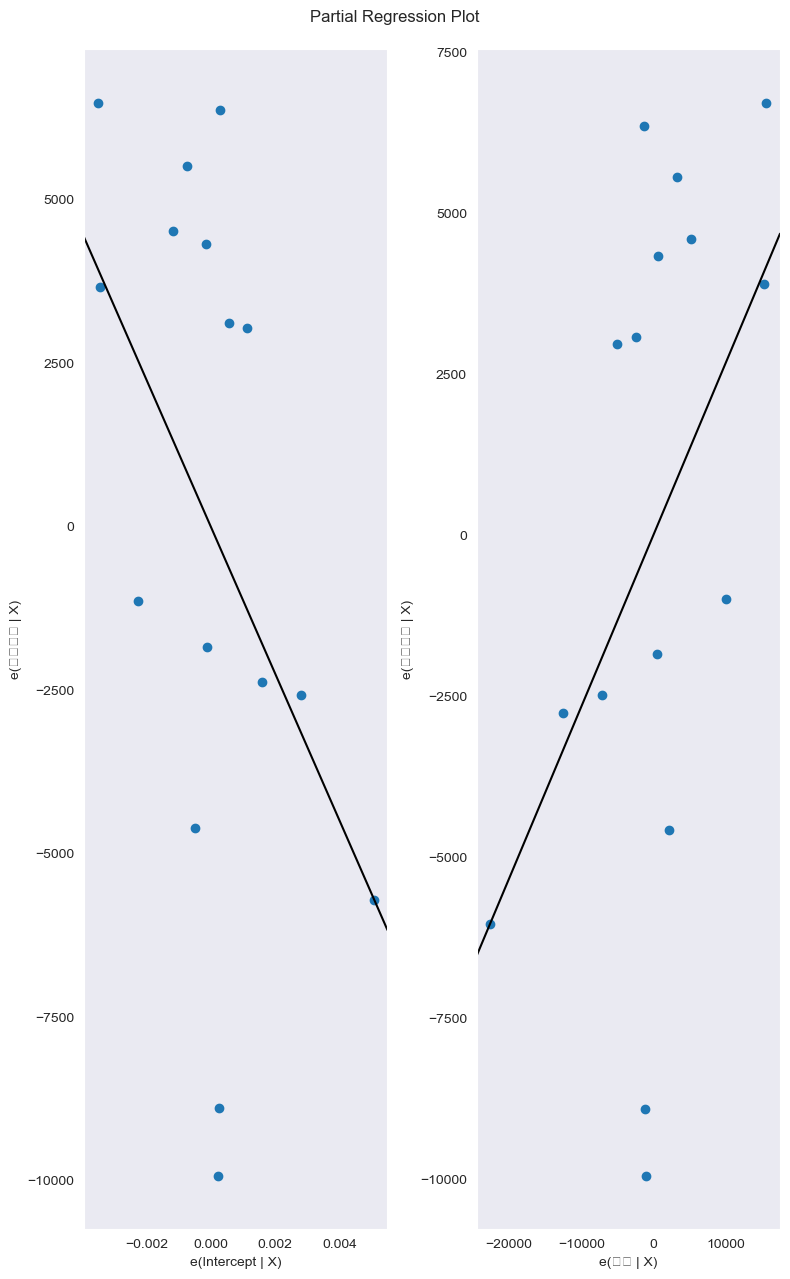

In [21]:
import statsmodels.api as sm

others = list(set(merged_df.columns).difference(set(['실거래가', '인구'])))
p, resid = sm.graphics.plot_partregress('실거래가', '인구', others, data=merged_df, ret_coords=True)
plt.show()
fig=plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()